In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('Victoria_craigslist_032021.csv')
df

,Title,Title_URL,Image,Price,resulthood,beds,baths,square_footage
0,Crossing at Belmont - Brand New 1 Bedroom + De...,https://victoria.craigslist.org/apa/d/highland...,https://images.craigslist.org/00k0k_4pNB1tWda3...,"$1,975",NaN,1BR,1Ba,770.0
1,2 Bed / 2 Bath available in Langford!,https://victoria.craigslist.org/apa/d/highland...,https://images.craigslist.org/00303_64mWMNo4j8...,"$1,680","(Langford, BC)",2BR,1Ba,841.0
2,Brand new 2 bedroom suite,https://victoria.craigslist.org/apa/d/highland...,https://images.craigslist.org/00F0F_ezIytz94aY...,"$1,800",(Langford),2BR,1Ba,NaN
3,1 Bedroom Apartment for Rent next to Millstre...,https://victoria.craigslist.org/apa/d/highland...,https://images.craigslist.org/00a0a_beWxrYXrJ9...,$977,(665 Redington Avenue),1BR,1Ba,NaN
4,2 Bedroom Fully Furnished Suite - Bear Mountain,https://victoria.craigslist.org/apa/d/highland...,https://images.craigslist.org/00A0A_iYnzjSiQCf...,"$2,100",(Victoria / Langford area),2BR,1Ba,1000.0
...,...,...,...,...,...,...,...,...
708,Belgrove Apartments-2 Bedroom-Available April 1st,https://victoria.craigslist.org/apa/d/victoria...,https://images.craigslist.org/00T0T_8zDaf8pXUD...,"$1,695",NaN,2BR,1Ba,757.0
709,Belgrove Apartments-1 Bedroom-Available May 1st,https://victoria.craigslist.org/apa/d/victoria...,https://images.craigslist.org/00J0J_lDAlTVIDVk...,"$1,350",NaN,1BR,1Ba,637.0
710,1 Bedroom Suites at Grenadier Manor,https://victoria.craigslist.org/apa/d/victoria...,https://images.craigslist.org/00B0B_khSEgjeEkN...,"$1,375",(Victoria),1BR,1Ba,750.0
711,"LARGE 3 BED Rooms on Tyndall Ave, Gordon Head",https://victoria.craigslist.org/apa/d/victoria...,https://images.craigslist.org/00P0P_2jQMrTKp5y...,"$2,100",(VICTORIA),3BR,1Ba,NaN


In [14]:
def conv(text):
    text = "".join([char for char in text if char not in (' ','\n', 'br', '-')])
    return text

def currency_conv(text):
    text = "".join([char for char in text if char not in ('$',',')])
    return float(text)

def to_numeric(string):
    return int(string)

In [16]:
df = df[df['beds'].notna()]
df = df[df['baths'].notna()]
df = df[df['square_footage'].notna()]

for i in df.columns:
    print(len(df[df[i].isna()]), i)

0 Title
0 Title_URL
42 Image
0 Price
147 resulthood
0 beds
0 baths
0 square_footage


In [18]:
df['Price'] = df['Price'].apply(lambda x: currency_conv(x))
df['beds'] = df['beds'].str[0].apply(lambda x: to_numeric(x))
df['baths'] = df['baths'].str[0].apply(lambda x: to_numeric(x))

In [19]:
df2 = df[['Price','beds', 'baths', 'square_footage']]

In [20]:
# Drop 'wanted' or 'looking' or 'seeking' listings, these are likely to be rent seekers and are invalid
wanted = df[df['Title'].str.contains('wanted',case=False)].index
df = df.drop(index=wanted)
looking = df[df['Title'].str.contains('looking',case=False)].index
df = df.drop(index=looking)
seeking = df[df['Title'].str.contains('seeking',case=False)].index
df = df.drop(index=seeking)

oddbeds = df[df['beds']=='n'].index
df = df.drop(index=oddbeds)

price_outlier = df[df['Price']>5000].index
df = df.drop(index=price_outlier)

sqft_outlier1 = df[df['square_footage']>4000].index
df = df.drop(index=sqft_outlier1)
sqft_outlier2 = df[df['square_footage']<375].index
df = df.drop(index=sqft_outlier2)

price_outlier = df[df['Price']>5000].index
df = df.drop(index=price_outlier)

AxesSubplot(0.125,0.125;0.775x0.755)


529     900.0
243     900.0
238     900.0
235     900.0
234     900.0
        ...  
165    3700.0
66     3700.0
522    3900.0
502    3950.0
39     4000.0
Name: Price, Length: 460, dtype: float64

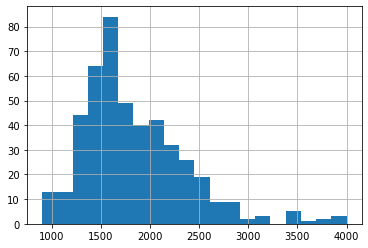

In [21]:
# Check to see what the prices are like
print(df['Price'].hist(bins=20))
df['Price'].sort_values()

AxesSubplot(0.125,0.125;0.775x0.755)


316     391.0
290     391.0
604     400.0
481     400.0
676     400.0
        ...  
39     1800.0
267    1900.0
47     2000.0
66     2268.0
165    2500.0
Name: square_footage, Length: 460, dtype: float64

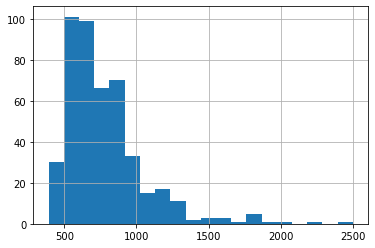

In [22]:
# Check to see what the area is like
print(df['square_footage'].hist(bins=20))
df['square_footage'].sort_values()

AxesSubplot(0.125,0.125;0.775x0.755)


276    0
281    0
554    0
386    0
563    0
      ..
668    4
122    4
130    4
165    4
66     5
Name: beds, Length: 460, dtype: int64

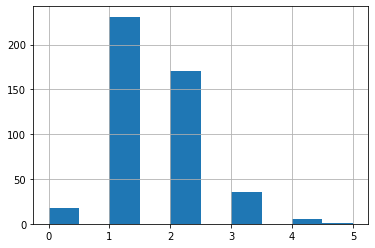

In [23]:
# Check to see what the number of bedrooms is like
print(df['beds'].hist())
df['beds'].sort_values()

AxesSubplot(0.125,0.125;0.775x0.755)


0      1
470    1
468    1
462    1
461    1
      ..
412    2
47     3
333    3
165    3
111    4
Name: baths, Length: 460, dtype: int64

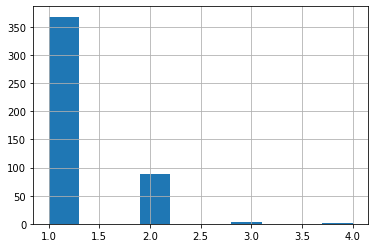

In [24]:
# Check to see what the number of bathrooms is like
print(df['baths'].hist())
df['baths'].sort_values()

In [25]:
mldf = df[['Price','beds', 'baths', 'square_footage']]
mldf

,Price,beds,baths,square_footage
0,1975.0,1,1,770.0
1,1680.0,2,1,841.0
4,2100.0,2,1,1000.0
8,1650.0,1,1,575.0
9,1650.0,1,1,575.0
...,...,...,...,...
704,1700.0,2,1,1200.0
706,1375.0,1,1,750.0
708,1695.0,2,1,757.0
709,1350.0,1,1,637.0


In [32]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set, 70/30
X_train, X_test, y_train, y_test = train_test_split(mldf[['beds','baths','square_footage']], mldf['Price'], test_size=0.8,random_state=109) 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [178.52241549 358.16021995   0.59933935]
Mean squared error: 135776.02
Coefficient of determination: 0.48


In [38]:
import pickle
# save the model to disk
filename = 'mvp_model_craigslist.sav'
pickle.dump(regr, open(filename, 'wb'))

In [40]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
beds = 3
baths = 1
sq_ft = 3000
result = loaded_model.predict(np.array([beds,baths,sq_ft]).reshape(1, -1))
print(result[0])

3354.1314280772926
